In [6]:
#import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#import the dataframe 
df=pd.read_csv("Fraud_Data.csv")


In [3]:
#check the head
#check the tail
#check the null value
#perform eda 
# perform data enginnering such as dummy values ,creating new column 


In [4]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,24-02-2015 22:55,18-04-2015 02:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,07-06-2015 20:39,08-06-2015 01:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,01-01-2015 18:52,01-01-2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,28-04-2015 21:13,04-05-2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,21-07-2015 07:09,09-09-2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151107,345170,27-01-2015 03:03,29-03-2015 00:30,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,15-05-2015 17:43,26-05-2015 12:24,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,03-03-2015 23:07,20-05-2015 07:07,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,09-07-2015 20:06,07-09-2015 09:34,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0
151111,138208,10-06-2015 07:02,21-07-2015 02:03,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [7]:
df.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,135572,121599,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,06-01-2015 12:10,06-01-2015 12:10,NaN,KIPFSCNUGOLDP,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,29,27,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


In [8]:
#check for the null values
df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [9]:
#the columns
df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [10]:
# shape of the dataset
df.shape

(151112, 11)

In [11]:
# Lets us see the distict count on target variable
df['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [12]:
#convert to datetime
import datetime as dt

df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [13]:
#check for the datatypes
df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

In [168]:
# time to buy in days
df['time_to_buy'] = (df['purchase_time'] - df['signup_time']).dt.days

In [163]:
#Let us find the month which has max purchase value
df_month=df['purchase_value'].idxmax()
df.iloc[17668,:]

user_id                        255985
signup_time       2015-02-02 06:43:00
purchase_time     2015-02-14 10:20:00
purchase_value                    154
device_id               CGBFIRLRNKSVH
source                            SEO
browser                        Safari
sex                                 M
age                                26
ip_address              1334137264.00
class                               0
time_to_buy                        12
Name: 17668, dtype: object

In [96]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_buy
0,22058,2015-02-24 22:55:00,2015-04-18 02:47:00,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.80,0,52
1,333320,2015-07-06 20:39:00,2015-08-06 01:38:00,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.90,0,30
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.00,1,0
3,150084,2015-04-28 21:13:00,2015-04-05 13:54:00,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542444.00,0,-24
4,221365,2015-07-21 07:09:00,2015-09-09 18:40:00,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.50,0,50


In [119]:
#eda on time to buy vs purchase value (6 bins)
df_time_purchase=df[['purchase_value','time_to_buy']]

In [121]:
df_purchase_o_25=df_time_purchase[df_time_purchase['purchase_value']<25]
df_purchase_25_50=df_time_purchase[(df_time_purchase['purchase_value']>25) & (df_time_purchase['purchase_value']<=50)]
df_purchase_50_75=df_time_purchase[(df_time_purchase['purchase_value']>50) & (df_time_purchase['purchase_value']<=75)]
df_purchase_75_100=df_time_purchase[(df_time_purchase['purchase_value']>75) & (df_time_purchase['purchase_value']<=100)]
df_purchase_100_125=df_time_purchase[(df_time_purchase['purchase_value']>100) & (df_time_purchase['purchase_value']<=125)]
df_purchase_125_160=df_time_purchase[(df_time_purchase['purchase_value']>125) & (df_time_purchase['purchase_value']<=160)]

In [140]:
#for each group lets calculate the min .max,mean time to buy days 
print(" For a purchase value between 0 to 25 , the max days taken to buy is {a}".format(a=df_purchase_o_25['time_to_buy'].max()))
print(" For a purchase value between 0 to 25 , the min days taken to buy is {a}".format(a=df_purchase_o_25['time_to_buy'].min()))
print(" For a purchase value between 0 to 25 , the avergae days taken to buy is {a}".format(a=df_purchase_o_25['time_to_buy'].mean()))


 For a purchase value between 0 to 25 , the max days taken to buy is 337
 For a purchase value between 0 to 25 , the min days taken to buy is -334
 For a purchase value between 0 to 25 , the avergae days taken to buy is 32.38170960664118


In [141]:
print(" For a purchase value between 25 to 50 , the max days taken to buy is {a}".format(a=df_purchase_25_50['time_to_buy'].max()))
print(" For a purchase value between 25 to 50 , the min days taken to buy is {a}".format(a=df_purchase_25_50['time_to_buy'].min()))
print(" For a purchase value between 25 to 50 , the avergae days taken to buy is {a}".format(a=df_purchase_25_50['time_to_buy'].mean()))


 For a purchase value between 25 to 50 , the max days taken to buy is 337
 For a purchase value between 25 to 50 , the min days taken to buy is -334
 For a purchase value between 25 to 50 , the avergae days taken to buy is 32.63043104928731


In [150]:
print(" For a purchase value between 50 to 75 , the max days taken to buy is {a}".format(a=df_purchase_50_75['time_to_buy'].max()))
print(" For a purchase value between 50 to 75 , the min days taken to buy is {a}".format(a=df_purchase_50_75['time_to_buy'].min()))
print(" For a purchase value between 50 to 75 , the avergae days taken to buy is {a}".format(a=df_purchase_50_75['time_to_buy'].mean()))


 For a purchase value between 50 to 75 , the max days taken to buy is 337
 For a purchase value between 50 to 75 , the min days taken to buy is -334
 For a purchase value between 50 to 75 , the avergae days taken to buy is 33.04549183129401


In [153]:
print(" For a purchase value between 75 to 100 , the max days taken to buy is {a}".format(a=df_purchase_75_100['time_to_buy'].max()))
print(" For a purchase value between 75 to 100 , the min days taken to buy is {a}".format(a=df_purchase_75_100['time_to_buy'].min()))
print(" For a purchase value between 75 to 100 , the avergae days taken to buy is {a}".format(a=df_purchase_75_100['time_to_buy'].mean()))


 For a purchase value between 75 to 100 , the max days taken to buy is 335
 For a purchase value between 75 to 100 , the min days taken to buy is -332
 For a purchase value between 75 to 100 , the avergae days taken to buy is 33.96786603303915


In [154]:
print(" For a purchase value between 100 to 125 , the max days taken to buy is {a}".format(a=df_purchase_100_125['time_to_buy'].max()))
print(" For a purchase value between 100 to 125 , the min days taken to buy is {a}".format(a=df_purchase_100_125['time_to_buy'].min()))
print(" For a purchase value between 100 to 125 , the avergae days taken to buy is {a}".format(a=df_purchase_100_125['time_to_buy'].mean()))


 For a purchase value between 100 to 125 , the max days taken to buy is 322
 For a purchase value between 100 to 125 , the min days taken to buy is -303
 For a purchase value between 100 to 125 , the avergae days taken to buy is 27.116104868913858


In [155]:
print(" For a purchase value between 125 to 150 , the max days taken to buy is {a}".format(a=df_purchase_125_160['time_to_buy'].max()))
print(" For a purchase value between 125 to 150 , the min days taken to buy is {a}".format(a=df_purchase_125_160['time_to_buy'].min()))
print(" For a purchase value between 125 to 150 , the avergae days taken to buy is {a}".format(a=df_purchase_125_160['time_to_buy'].mean()))


 For a purchase value between 125 to 150 , the max days taken to buy is 250
 For a purchase value between 125 to 150 , the min days taken to buy is -120
 For a purchase value between 125 to 150 , the avergae days taken to buy is 27.833333333333332


<AxesSubplot:>

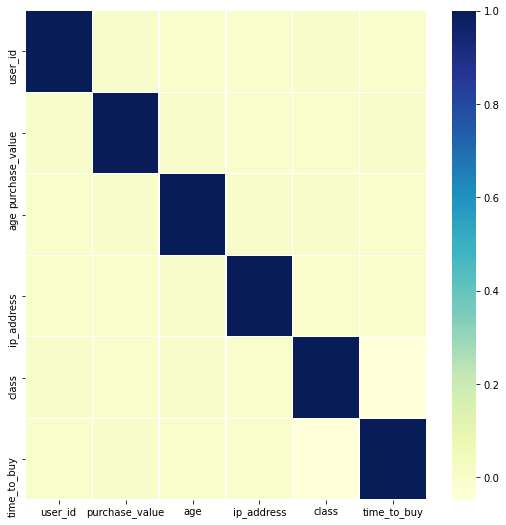

In [99]:
#check for correlation
import seaborn as sns
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,ax=ax,cmap='YlGnBu',linewidths=0.1)

# Result No corelation

<AxesSubplot:xlabel='class', ylabel='time_to_buy'>

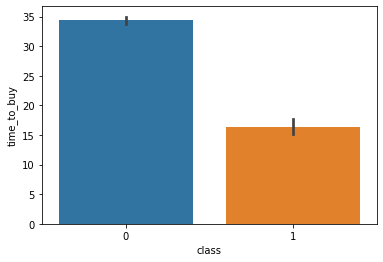

In [100]:
# visualization on class wrt time to buy
import seaborn as sns
sns.barplot(x="class",y="time_to_buy",data=df)

In [18]:
#now analyze the class which has fraud 
  #Sex
  # Age
  # from which source they have mailny user and browser
  # check if user id has used multiple device id   and the value 


In [101]:
# creating a dataframe with class=1 (fraud)
df_class_fraud=df[df['class']==1]

In [102]:
#check the Dataframe
df_class_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_buy
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.00,1,0
24,171711,2015-11-01 01:51:00,2015-11-01 01:51:00,52,YPLQGKBAAULUV,Direct,IE,F,35,1120619336.00,1,0
25,59780,2015-04-01 22:32:00,2015-01-16 01:13:00,31,WUMOBGUCBOXPO,SEO,FireFox,M,36,1752166824.00,1,-76
29,151705,2015-07-01 03:44:00,2015-07-01 03:44:00,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2836025221.00,1,0
59,345865,2015-01-02 05:59:00,2015-02-20 08:09:00,36,FKQPZUELCRKBL,SEO,IE,M,30,2740589787.00,1,49


In [103]:
# now in fraud dataframe let us see how many are male and female 
df_class_fraud['sex'].value_counts()

M    8434
F    5717
Name: sex, dtype: int64

In [104]:
#lets check the brwser used maximum
df_class_fraud['browser'].value_counts()

Chrome     6069
IE         3187
FireFox    2342
Safari     2225
Opera       328
Name: browser, dtype: int64

In [105]:
#let us check the age bucket
df_age0_20=df_class_fraud[df_class_fraud['age']<20]
print("People with age less than 20 is {a}".format(a=df_age0_20.shape[0]))
df_age20_40=df_class_fraud[(df_class_fraud['age']>20) &(df_class_fraud['age']<40)]
print("People with age grater than 20 and less than 40 is {a}".format(a=df_age20_40.shape[0]))
df_age40=df_class_fraud[(df_class_fraud['age']>40)]
print("People with age grater than 40 is {a}".format(a=df_age40.shape[0]))


People with age less than 20 is 512
People with age grater than 20 and less than 40 is 10049
People with age grater than 40 is 2802


In [106]:
#chekcing the source where the fraud is routing from
df_class_fraud['source'].value_counts()

Ads       5513
SEO       5412
Direct    3226
Name: source, dtype: int64

In [25]:
#..................................................................

In [26]:
#check the duplicates for both user id and device id

In [107]:
df_dup=df_class_fraud[df_class_fraud.duplicated(subset=['user_id','device_id'],keep=False)]

In [108]:
df_dup

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_buy


In [ ]:
#result :- their is no duplicates with same user id and device_id

In [109]:
#check if one user id has more than one device id
userid_deviceid=pd.DataFrame(df_class_fraud.groupby(['user_id','device_id']).size()).reset_index()

In [110]:
userid_deviceid[0].unique()

array([1], dtype=int64)

In [ ]:
#result :- their is no user id with more than one device id

In [ ]:
#----------------------------------------------------------------------

In [111]:
#check if one device id has more than one user id
deviceid_userid=pd.DataFrame(df_class_fraud.groupby(['device_id']).size()).reset_index()
deviceid_userid.head()

,device_id,0
0,AAAXXOZJRZRAO,10
1,AADGMPYOPXXCX,1
2,AAEWGRKQJJMVI,1
3,AAIEIZJZIKDLN,1
4,AAJCSUCPHKORJ,1


In [112]:
#now let us check the device id tagged with multiple user id 
deviceid_userid_multi=deviceid_userid[deviceid_userid[0]>1]

In [113]:
deviceid_userid_multi

,device_id,0
0,AAAXXOZJRZRAO,10
7,AANYBGQSWHRTK,7
31,ADEDUDCYQMYTI,13
32,ADFZEAZJYIAOI,2
36,AEIDJUGTZWDBU,2
...,...,...
6969,ZYPKBBYHNPZDI,2
6977,ZYZQZXBXADPST,15
6979,ZZCAWCKYVMWNH,8
6980,ZZFFPOVMCQVCG,6


In [114]:
#now let us get the user-id mapped with multiple device id
deviceid_multi=df_class_fraud['device_id'].isin(deviceid_userid_multi['device_id'])
deviceid_multi1=df_class_fraud[deviceid_multi]

In [115]:
#check the dataframe
deviceid_multi1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_buy
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.00,1,0
24,171711,2015-11-01 01:51:00,2015-11-01 01:51:00,52,YPLQGKBAAULUV,Direct,IE,F,35,1120619336.00,1,0
29,151705,2015-07-01 03:44:00,2015-07-01 03:44:00,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2836025221.00,1,0
64,181004,2015-07-01 17:45:00,2015-07-01 17:45:00,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2293332682.00,1,0
77,392706,2015-07-01 08:15:00,2015-07-01 08:15:00,65,VRYLIRAQJIIIE,SEO,Opera,F,30,1213104904.00,1,0


In [164]:
#grpuping device id to get count of user id and mean of purchase value
deviceid_multi1.groupby('device_id').agg({'user_id':'count','purchase_value':'mean'})

,user_id,purchase_value
device_id,,
AAAXXOZJRZRAO,10,57.00
AANYBGQSWHRTK,7,42.00
ADEDUDCYQMYTI,13,52.00
ADFZEAZJYIAOI,2,24.50
AEIDJUGTZWDBU,2,71.00
...,...,...
ZYPKBBYHNPZDI,2,46.00
ZYZQZXBXADPST,15,40.00
ZZCAWCKYVMWNH,8,38.00


In [156]:
#findings
-device id and user id pattern 
-time to buy -relation ship between user signing to purchase
-age
-source 




In [ ]:
#------------------------------------------------------------------------------------------------------

# Preprocessing

In [2]:
#treat oversampling/undersampling/smote
#dummy value after spliting
#normalization 
#model training


In [7]:
from imblearn import under_sampling

In [10]:
import datetime as dt

df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [92]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_buy
0,22058,2015-02-24 22:55:00,2015-04-18 02:47:00,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,52
1,333320,2015-07-06 20:39:00,2015-08-06 01:38:00,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,30
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0
3,150084,2015-04-28 21:13:00,2015-04-05 13:54:00,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,-24
4,221365,2015-07-21 07:09:00,2015-09-09 18:40:00,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,50


In [11]:
df['time_to_buy'] = (df['purchase_time'] - df['signup_time']).dt.days

In [13]:
df1=df.copy()

In [53]:
df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'time_to_buy'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df1.drop(columns=['class'],axis=1)
y=df1['class']

In [16]:
x.drop(labels=['user_id','signup_time','purchase_time','device_id','ip_address'],axis=1,inplace=True)

In [17]:
x.head()

,purchase_value,source,browser,sex,age,time_to_buy
0,34,SEO,Chrome,M,39,52
1,16,Ads,Chrome,F,53,30
2,15,SEO,Opera,M,53,0
3,44,SEO,Safari,M,41,-24
4,39,Ads,Safari,M,45,50


# undersampling 

In [18]:

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus=RandomUnderSampler(random_state=0)
x_u,y_u=rus.fit_resample(x,y)
print(sorted(Counter(y_u).items()),y_u.shape)

[(0, 14151), (1, 14151)] (28302,)


In [21]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_u,y_u,test_size=0.3,random_state=0)

In [22]:
x_train1.head()

,purchase_value,source,browser,sex,age,time_to_buy
565,56,SEO,Chrome,F,25,278
1424,16,Ads,FireFox,F,44,-157
18609,11,Ads,Chrome,F,29,216
7993,34,Direct,Chrome,F,35,91
19357,23,Ads,Chrome,F,36,1


In [23]:
x_train1.dtypes

purchase_value     int64
source            object
browser           object
sex               object
age                int64
time_to_buy        int64
dtype: object

# Onehotencoder

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#--------------------

In [66]:
test=x_train1.iloc[0:1,:]

In [71]:
test

,purchase_value,source,browser,sex,age,time_to_buy
0,56,SEO,Chrome,F,25,278


In [69]:
test_onehot= one_hot.transform(test[['source','browser','sex']])
test_onehot1=pd.DataFrame(test_onehot,columns=one_hot.get_feature_names_out())


C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [70]:
test_onehot1

,x0_Direct,x0_SEO,x1_FireFox,x1_IE,x1_Opera,x1_Safari,x2_M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
test2=pd.concat([test,test_onehot1],axis=1)

In [73]:
test2.head()

,purchase_value,source,browser,sex,age,time_to_buy,x0_Direct,x0_SEO,x1_FireFox,x1_IE,x1_Opera,x1_Safari,x2_M
0,56,SEO,Chrome,F,25,278,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [74]:
a=2

In [ ]:
b=3

In [86]:
c=pd.DataFrame({'name':[1]})

In [88]:
d=pd.DataFrame({'age':[a]})

In [90]:
tt=pd.concat([c,d],axis=1)

In [91]:
tt

,name,age
0,1,2


In [84]:
b=pd.DataFrame({'a':2})

ValueError: If using all scalar values, you must pass an index

In [ ]:
#-------------------------------

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
#perform one hot encoder on train
one_hot = OneHotEncoder(drop='first',handle_unknown='error',sparse=False)
x_train_onehot= one_hot.fit_transform(x_train1[['source','browser','sex']])
x_train_onehot1=pd.DataFrame(x_train_onehot,columns=one_hot.get_feature_names_out())
x_train1=x_train1.reset_index(drop=True)
x_train_new=pd.concat([x_train1,x_train_onehot1],axis=1)

In [96]:
x_train_new1=x_train_new.drop(columns=['source','browser','sex'],axis=1)

In [97]:
x_train_new1.head()

,purchase_value,age,time_to_buy,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,56,25,278,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,16,44,-157,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,11,29,216,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34,35,91,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,36,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#perform one hot encoder on test
x_test_onehot= one_hot.fit_transform(x_test1[['source','browser','sex']])
x_test_onehot1=pd.DataFrame(x_test_onehot,columns=one_hot.get_feature_names_out())
x_test1=x_test1.reset_index(drop=True)
x_test_new=pd.concat([x_test1,x_test_onehot1],axis=1)
x_test_new1=x_test_new.drop(columns=['source','browser','sex'],axis=1)


# normalization

In [29]:
#normalization
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()

In [31]:
#normalization on train dataset
x_train_new1[['purchase_value','age','time_to_buy']]=norm.fit_transform(x_train_new1[['purchase_value','age','time_to_buy']])


In [32]:
#normalization on test
x_test_new1[['purchase_value','age','time_to_buy']]=norm.transform(x_test_new1[['purchase_value','age','time_to_buy']])

# model 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [104]:
rf1 = RandomForestClassifier(n_estimators=200,
 min_samples_split=14,
 min_samples_leaf= 6,
 max_features='sqrt',
 max_depth=10,
 criterion='entropy')
rf1.fit(x_train_new1,y_train1)
y_pred1=rf1.predict(x_test_new1)

In [54]:
x_train_new1.columns

Index(['purchase_value', 'age', 'time_to_buy', 'source_Direct', 'source_SEO',
       'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari',
       'sex_M'],
      dtype='object')

In [105]:
print("Evaluation Random forest classifier training dataset")
print("accuracy:"+str(metrics.accuracy_score(y_test1,y_pred1)))

Evaluation Random forest classifier
accuracy:0.5042986691791308


In [108]:
y_pred2=rf1.predict(x_train_new1)
print("Evaluation Random forest classifier")
print("accuracy:"+str(metrics.accuracy_score(y_train1,y_pred2)))

Evaluation Random forest classifier
accuracy:0.7720458331230124


# hyperparamter tuning

In [127]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [99]:
rf1=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train_new1,y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [100]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

# adaboost

In [40]:
#adabost
from sklearn.ensemble import AdaBoostClassifier
adamodel=AdaBoostClassifier(n_estimators=200,learning_rate=1)

In [41]:
adamodel.fit(x_train_new1,y_train1)

AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [51]:
x_test_new1.columns

Index(['purchase_value', 'age', 'time_to_buy', 'source_Direct', 'source_SEO',
       'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari',
       'sex_M'],
      dtype='object')

In [52]:
x.columns

Index(['purchase_value', 'source', 'browser', 'sex', 'age', 'time_to_buy'], dtype='object')

In [43]:
a=[[0.45,0.28,0.75,0.00,0.00,0.00,0.00, 0.00,1.00,0.00]]

In [44]:
yp=adamodel.predict(a)

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [45]:
yp

array([0], dtype=int64)

In [46]:
y_prod=adamodel.predict(x_test_new1)

In [98]:
x_test_new1.head()

,purchase_value,age,time_to_buy,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,0.193277,0.24,0.563338,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.453782,0.28,0.752608,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.117647,0.06,0.579732,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.546218,0.26,0.533532,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.201681,0.28,0.555887,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
print("Evaluation Random forest classifier testing dataset")
print("accuracy:"+str(metrics.accuracy_score(y_test1,y_prod)))

Evaluation Random forest classifier testing dataset
accuracy:0.761041102343658


In [48]:
y_prod_train=adamodel.predict(x_train_new1)
print("Evaluation Random forest classifier training dataset")
print("accuracy:"+str(metrics.accuracy_score(y_train1,y_prod_train)))

Evaluation Random forest classifier training dataset
accuracy:0.7695219827368633


In [ ]:
#export pickle file of the model and minmax object
# data entry - pd.get_dummies -- drop unwanted columns -- normalization- model predict


In [49]:
import pickle
with open('minmax.sav','wb') as f:
    pickle.dump(norm,f)
    
with open('randomforets.sav','wb') as f:
    pickle.dump(rf1,f)

with open('onehot.sav','wb') as f:
    pickle.dump(one_hot,f)

with open('adaboost.sav','wb') as f:
    pickle.dump(adamodel,f)
    


NameError: name 'rf1' is not defined

In [50]:
!pip freeze > requirements.txt

# lazy predict

In [42]:
#................................

In [110]:
!pip install lazypredict

In [111]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [112]:
clf=LazyClassifier(verbose=0,ignore_warnings=True)
models,predictions=clf.fit(x_train_new1,x_test_new1,y_train1,y_test1)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [13:32<00:00, 28.01s/it]


In [113]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.68,0.69,0.69,0.68,1.34
BernoulliNB,0.68,0.69,0.69,0.68,0.11
LinearDiscriminantAnalysis,0.67,0.67,0.67,0.67,0.21
RidgeClassifierCV,0.67,0.67,0.67,0.67,0.12
RidgeClassifier,0.67,0.67,0.67,0.67,0.10
LogisticRegression,0.67,0.67,0.67,0.67,0.12
LinearSVC,0.67,0.67,0.67,0.67,4.40
CalibratedClassifierCV,0.66,0.66,0.66,0.66,14.50
NearestCentroid,0.66,0.66,0.66,0.66,0.08


In [ ]:
........................................

# Normal with no handle of imbalanced

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train = pd.get_dummies(x_train,columns=['source','browser','sex'],drop_first=True)


In [25]:
x_train.drop(labels=['user_id','signup_time','purchase_time','device_id','ip_address'],axis=1,inplace=True)

In [26]:
x_train.head()

,purchase_value,age,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
99985,55,27,1,0,0,0,0,1,1
117490,34,23,0,0,0,0,0,0,1
81223,19,38,1,0,0,1,0,0,0
116199,23,40,0,1,1,0,0,0,1
985,16,29,0,1,0,0,0,0,1


In [27]:
x_test = pd.get_dummies(x_test,columns=['source','browser','sex'],drop_first=True)
x_test.drop(labels=['user_id','signup_time','purchase_time','device_id','ip_address'],axis=1,inplace=True)

In [28]:
x_test.head()

,purchase_value,age,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
134812,22,32,0,1,1,0,0,0,0
28562,38,32,0,1,0,0,0,0,1
118173,60,19,0,1,0,0,0,0,1
29561,13,34,0,1,1,0,0,0,0
150638,56,27,0,1,0,1,0,0,1


In [29]:
#normalization
from sklearn.preprocessing import MinMaxScaler
norm0=MinMaxScaler()
norm0=MinMaxScaler().fit(x_train)


In [30]:
x_train_norm0=norm0.transform(x_train)
x_test_norm0=norm0.transform(x_test)

In [31]:
x_train_norm0.shape

(105778, 9)

In [32]:
y_train.shape

(105778,)

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train_norm0,y_train)


RandomForestClassifier()

In [34]:
y_pred1=rf.predict(x_test_norm0)

In [35]:
print("Evaluation Random forest classifier")
print("accuracy:"+str(metrics.accuracy_score(y_test,y_pred1)))

Evaluation Random forest classifier
accuracy:0.9209864560815282


In [ ]:
#one hot encoder
#normalization
#model to pickle
